# 캐글 신용카드 사기검출

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### 데이터 일차 가공 및 모델 학습/예측/평가

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df=pd.read_csv("C:/Users/user/머신러닝/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
from sklearn.model_selection import train_test_split

#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy= df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [17]:
def get_train_test_dataset(df=None):
    df_copy= get_preprocessed_df(df)
    X_features= df_copy.iloc[:, :-1]
    y_target= df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test= get_train_test_dataset(card_df)

In [18]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [28]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]

#3장에서 사용한 get_clf_eval()함수를 이용해 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216, F1: 0.7216, AUC:0.8107


In [26]:
# get_clf_eval()가져옴
# 저번에 작성한 것에 ROC AUC를 추가함
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

In [33]:
# 인자로 사이킷런의 estimator 객체와 학습/테스트 데이터 세트를 입력받아 학습/예측/평가 수행
def get_model_train_eval(model,ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred= model.predict(ftr_test)
    pred_proba= model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [34]:
from lightgbm import LGBMClassifier
lgbm_clf= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC:0.8783


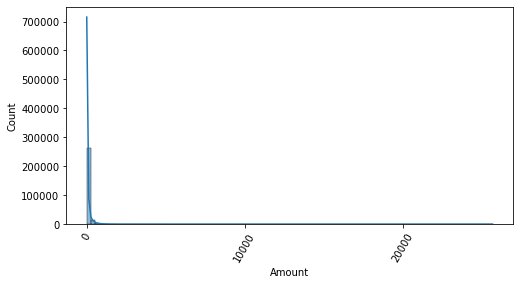

In [35]:
# 데이터 분포도 변환후 모델 학습/예측/평가
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 10000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 SStandardScaler를 이용해 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler= StandardScaler()
    amount_n= scaler.fit_transform(df_copy['Amount'].values. reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [42]:
X_train, X_test, y_train, y_test= get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf=LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test= X_test, tgt_train= y_train, tgt_test= y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train= y_train, tgt_test= y_test)


### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.8040
### LightGBM 예측 성능 ###
오차행렬
[[85150   145]
 [  125    23]]
정확도: 0.9968, 정밀도: 0.1369, 재현율: 0.1554, F1: 0.1456, AUC:0.5769


In [43]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_scaled', amount_n)
    df_copy.drop(['Time', 'Amount'],axis=1, inplace=True)
    return df_copy

In [45]:
X_train, X_test, y_train, y_test =get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC:0.8006
### LightGBM 예측 성능 ###
오차행렬
[[85217    78]
 [   78    70]]
정확도: 0.9982, 정밀도: 0.4730, 재현율: 0.4730, F1: 0.4730, AUC:0.7360


# 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

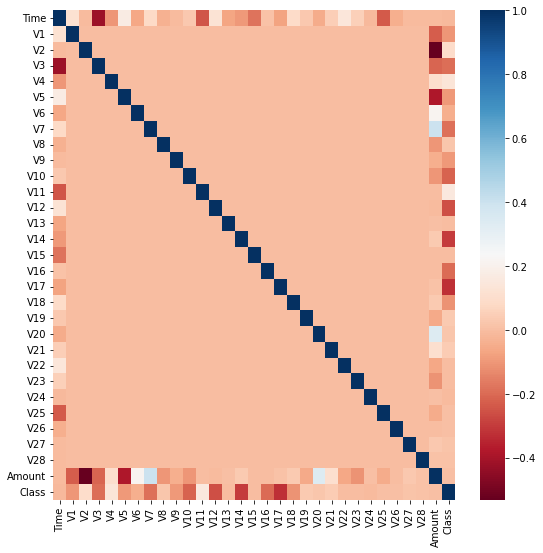

In [46]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [70]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud=df[df['Class']==1][column]
    quantile_25= np.percentile(fraud.values, 25)
    quantile_75= np.percentile(fraud.values, 75)
    
    #IQR을 구하고 IQR에 1.5를 곱해 최댓값, 최솟값 지점 구함
    iqr= quantile_75 - quantile_25
    iqr_weight= iqr * weight
    lowest_val= quantile_25 - iqr_weight
    highest_val= quantile_75 + iqr_weight
    #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index반환
    outlier_index=fraud[(fraud<lowest_val)| (fraud> highest_val)].index
    return outlier_index

In [71]:
outlier_index= get_outlier(df= card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [79]:
# get_processed_df()를 로그 변환 후 v14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n=np.log1p(df_copy['Amount'])

    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    outlier_index=get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy
    
X_train, X_test, y_train, y_test= get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test= X_test, tgt_train=y_train,
                    tgt_test=y_test)
print('### LightGBM예측성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC:0.8355
### LightGBM예측성능 ###
오차행렬
[[85268    27]
 [   36   110]]
정확도: 0.9993, 정밀도: 0.8029, 재현율: 0.7534, F1: 0.7774, AUC:0.8766


In [83]:
# SMOTE오버 샘플링 적용후 모델 학습/예측/평가

from imblearn.over_sampling import SMOTE

In [85]:
smote=SMOTE(random_state=0)

In [87]:
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [84]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.over.shape, y_train.over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

AttributeError: 'NoneType' object has no attribute 'split'